In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = 'Algerian_forest_fires_dataset_UPDATE.csv'
df_Bejaia = pd.read_csv(file, header=1)
df_Bejaia = df_Bejaia.iloc[:122, :]


In [3]:
df_Bejaia['Region'] = 'Bejaia'

In [4]:
df_Sidi_Bel_Abbes = pd.read_csv(file, header=125)
df_Sidi_Bel_Abbes['Region'] = 'Sidi-Bel Abbes'

In [5]:
frames = [df_Bejaia, df_Sidi_Bel_Abbes]
df = pd.concat(frames)

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:


df.astype({'day': 'int32', 'month': 'int32', 'year': 'int32', 'Temperature': 'int32', ' RH': 'int32', ' Ws': 'int32'}).dtypes

day             int32
month           int32
year            int32
Temperature     int32
 RH             int32
 Ws             int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region         object
dtype: object

In [8]:
df = df.rename(columns=lambda x: x.strip())
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
df['Rain'] = df['Rain'].astype(str).astype(float)

In [10]:
df.loc[165,['DC']] = 14.69

In [11]:
df['FFMC'] = df['FFMC'].astype(str).astype(float)
df['DMC'] = df['DMC'].astype(str).astype(float)
df['DC'] = df['DC'].astype(str).astype(float)
df['ISI'] = df['ISI'].astype(str).astype(float)
df['BUI'] = df['BUI'].astype(str).astype(float)


In [12]:
df['FWI'] = df['FWI'].str.strip()

In [13]:
df['FWI'] = df['FWI'].replace('fire', np.nan)

In [14]:
df['FWI'].isnull().sum()

np.int64(1)

In [15]:
df['FWI'] = df['FWI'].astype(str).astype(float)
df['day'] = df['day'].astype(str).astype(int)
df['month'] = df['month'].astype(str).astype(int)
df['year'] = df['year'].astype(str).astype(int)
df['Temperature'] = df['Temperature'].astype(str).astype(int)
df['RH'] = df['RH'].astype(str).astype(int)
df['Ws'] = df['Ws'].astype(str).astype(int)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


In [17]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035391
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [18]:
import csv
df.to_csv('sample.csv')

In [19]:
df['Classes'] = df['Classes'].str.strip() 

In [20]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,NaN,NaN,Sidi-Bel Abbes


In [21]:
df.dropna(inplace=True)

In [22]:
region_encoding = {'Bejaia':0, 'Sidi-Bel Abbes':1}
df['Region'] = df['Region'].map(region_encoding)


In [23]:
df['Region'] = df['Region'].astype(int) 
df['Classes'] = df['Classes'].astype(str)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 30.4+ KB


In [25]:
df.columns = df.columns.str.lower()

In [26]:
df.to_csv('sample.csv')

In [27]:
df.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'region'],
      dtype='object')

In [28]:
df_1 = df

In [29]:
df['classes'] = np.where(df['classes'] == 'fire', 1, 0)

<Axes: xlabel='month', ylabel='percent'>

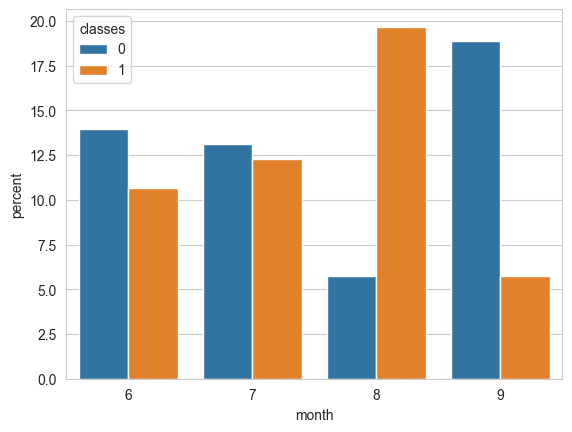

In [30]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='month', hue='classes', data=(df.loc[df['region']==0]), stat='percent', legend="auto")

<Axes: xlabel='month', ylabel='percent'>

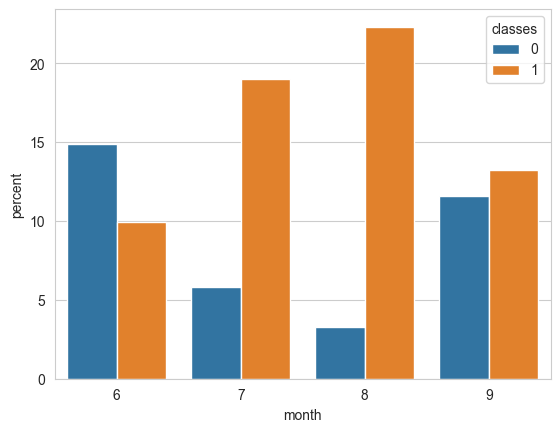

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='month', hue='classes', data=(df.loc[df['region']==1]), stat='percent', legend="auto")

In [32]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [33]:
df.head()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'rh'}>, <Axes: title={'center': 'ws'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'ffmc'}>,
        <Axes: title={'center': 'dmc'}>],
       [<Axes: title={'center': 'dc'}>, <Axes: title={'center': 'isi'}>,
        <Axes: title={'center': 'bui'}>],
       [<Axes: title={'center': 'fwi'}>,
        <Axes: title={'center': 'classes'}>,
        <Axes: title={'center': 'region'}>]], dtype=object)

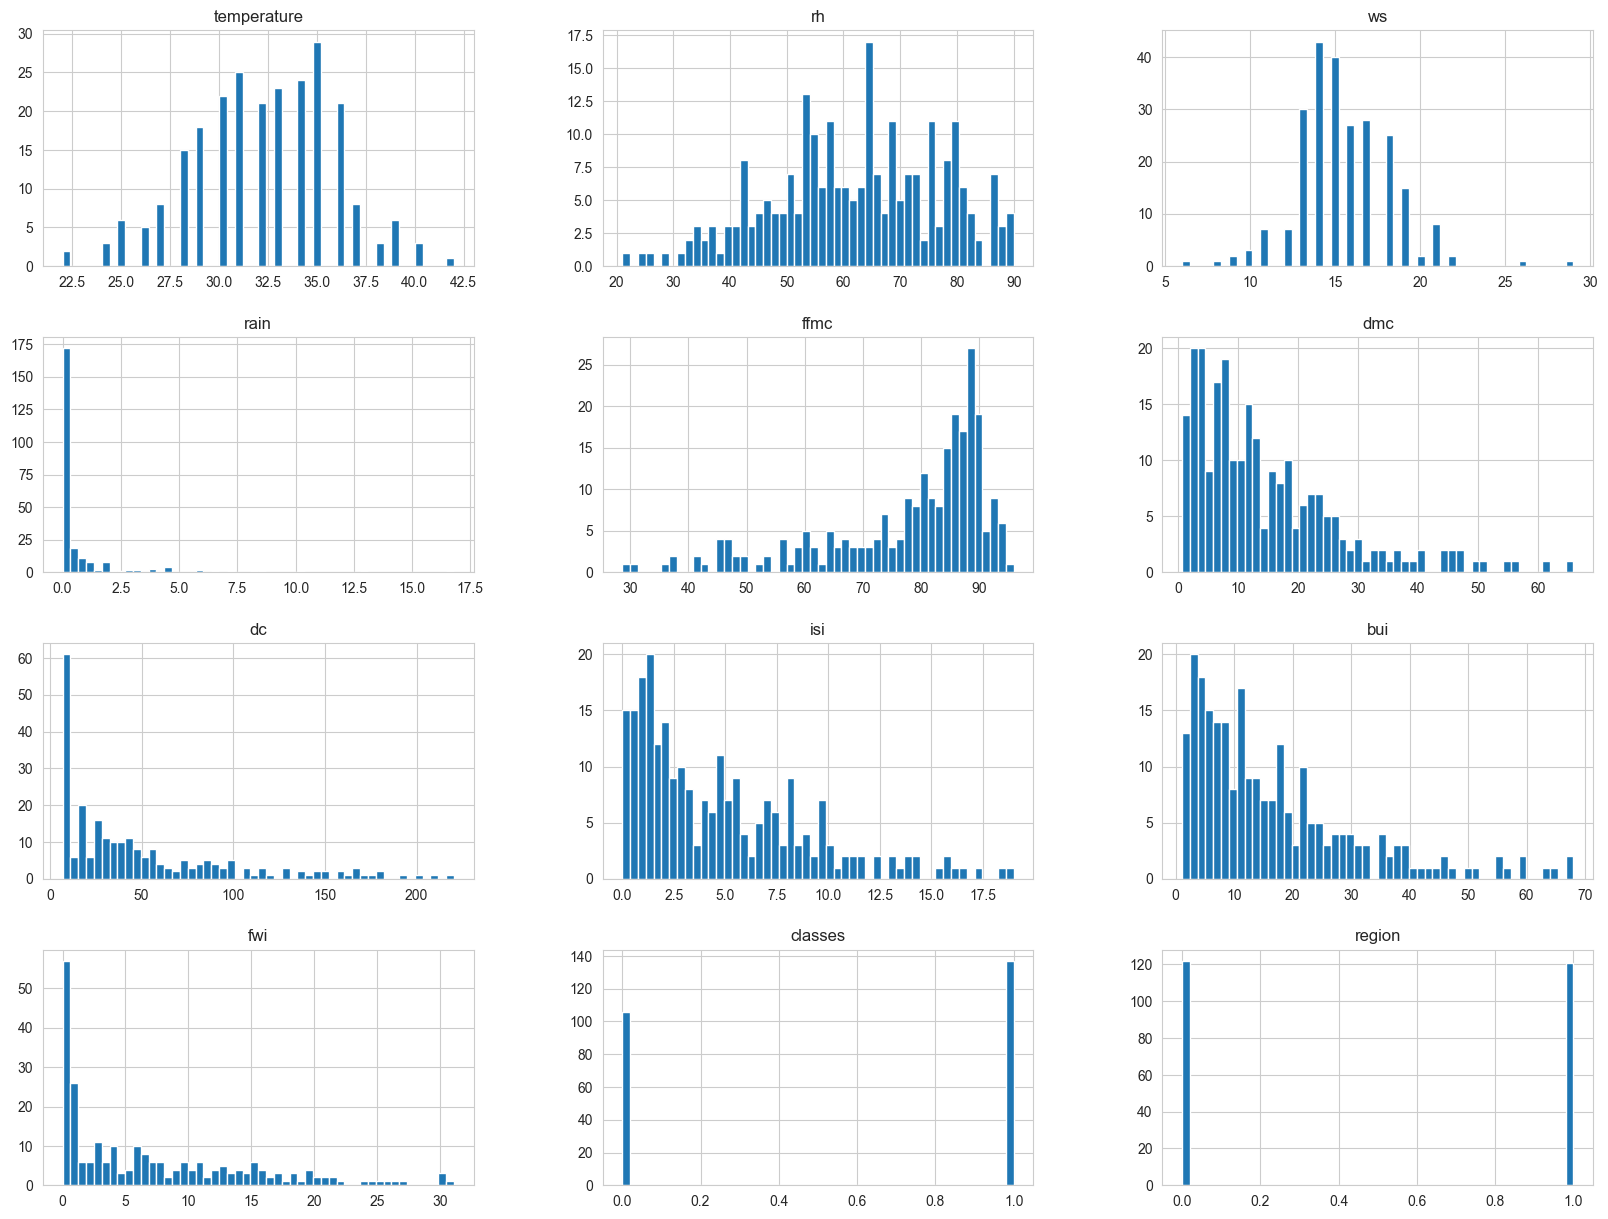

In [34]:
df.hist(bins=50, figsize=(20,15))

In [35]:
percentage=df['classes'].value_counts(normalize=True)*100
percentage

classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x1b669178380>,
 [Text(-0.2189564657232264, 1.0779879712306597, 'Fire'),
  Text(0.21895655996393085, -1.0779879520888727, 'Not Fire')],
 [Text(-0.11943079948539621, 0.5879934388530871, '56.4%'),
  Text(0.11943085088941681, -0.5879934284121123, '43.6%')])

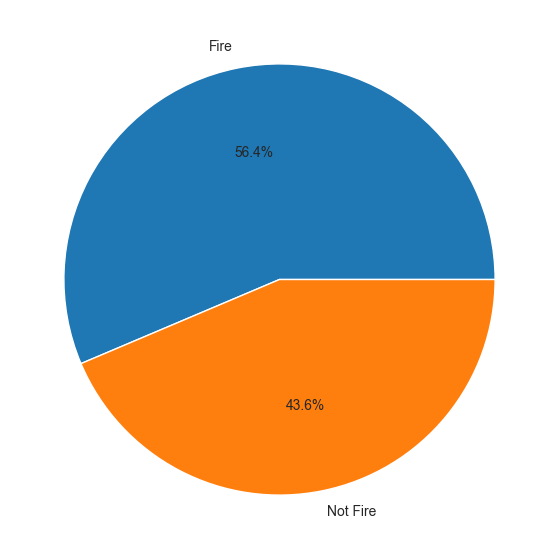

In [36]:
classlabels = ["Fire", "Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage, labels=classlabels,autopct='%0.1f%%')

In [37]:
df.corr()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
rh,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
ffmc,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
dmc,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
dc,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
isi,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
bui,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
fwi,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

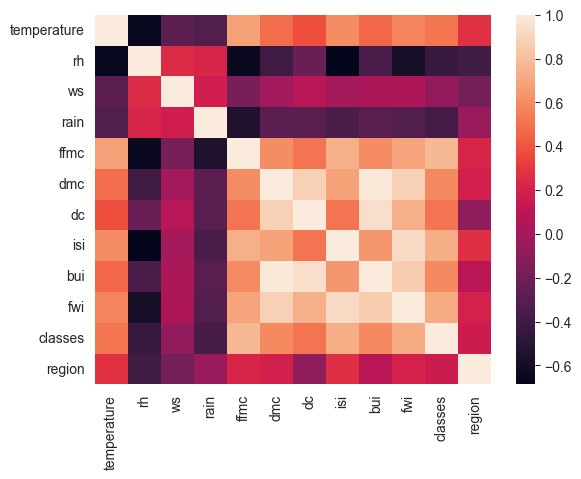

In [38]:
sns.heatmap(df.corr())